<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

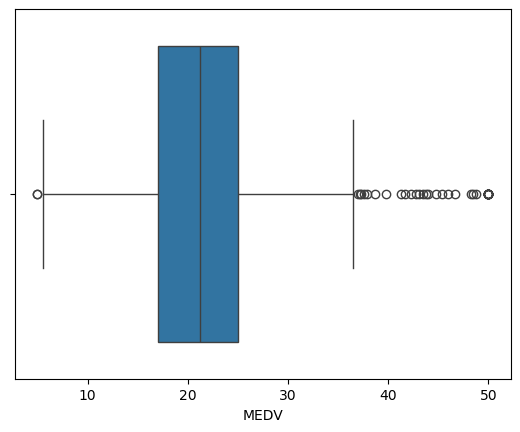

In [42]:
# For the "Median value of owner-occupied homes" provide a boxplot
#owner_occupied_data = boston_df.MEDV
sns.boxplot(x='MEDV', data=boston_df)

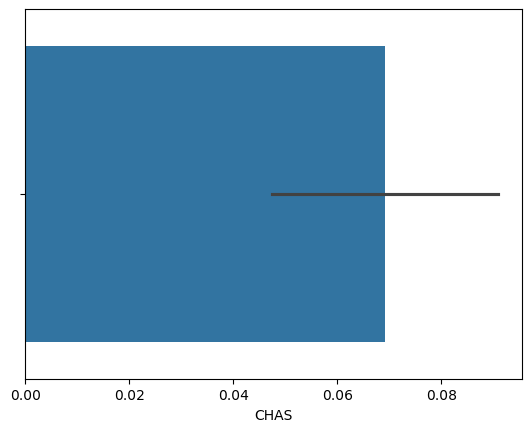

In [16]:
#•	Provide a bar plot for the Charles river variable

ax = sns.barplot(x="CHAS", data=boston_df)
pyplot.show()

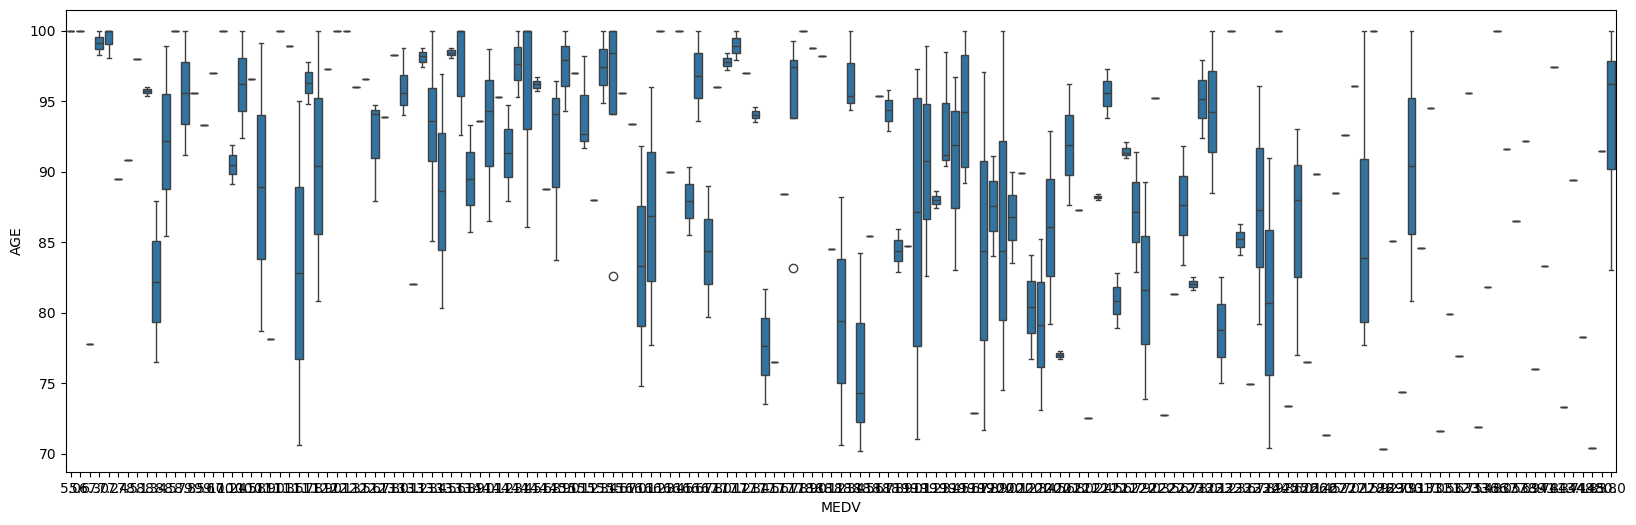

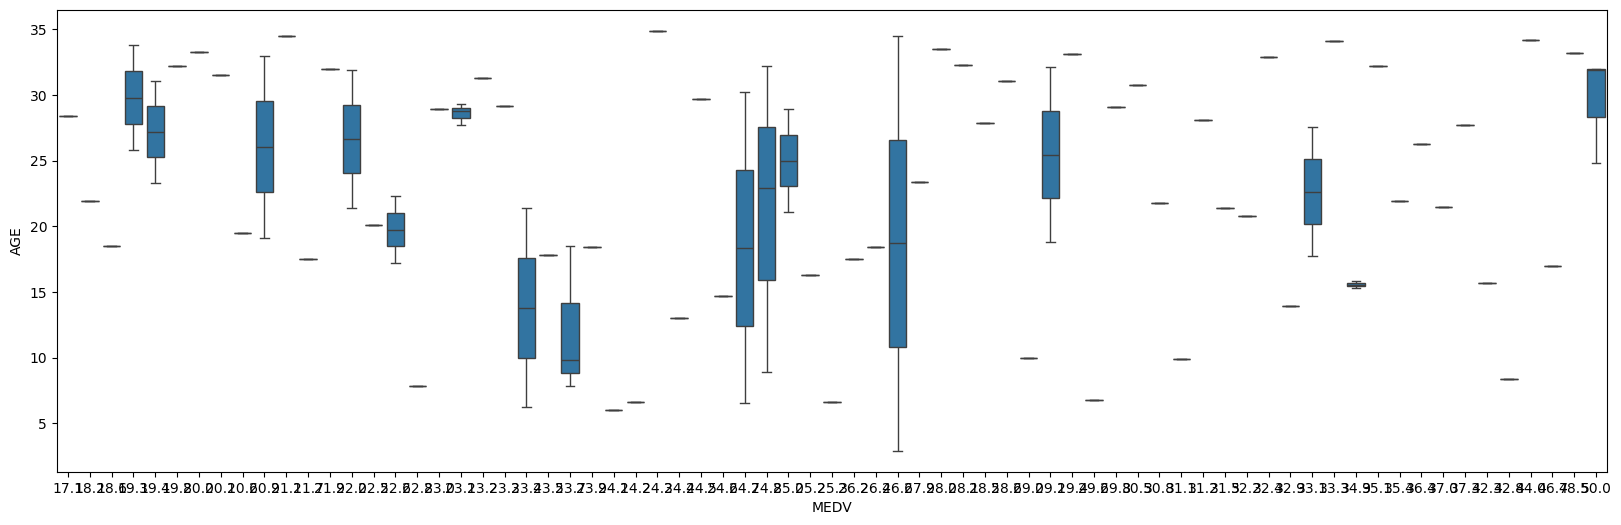

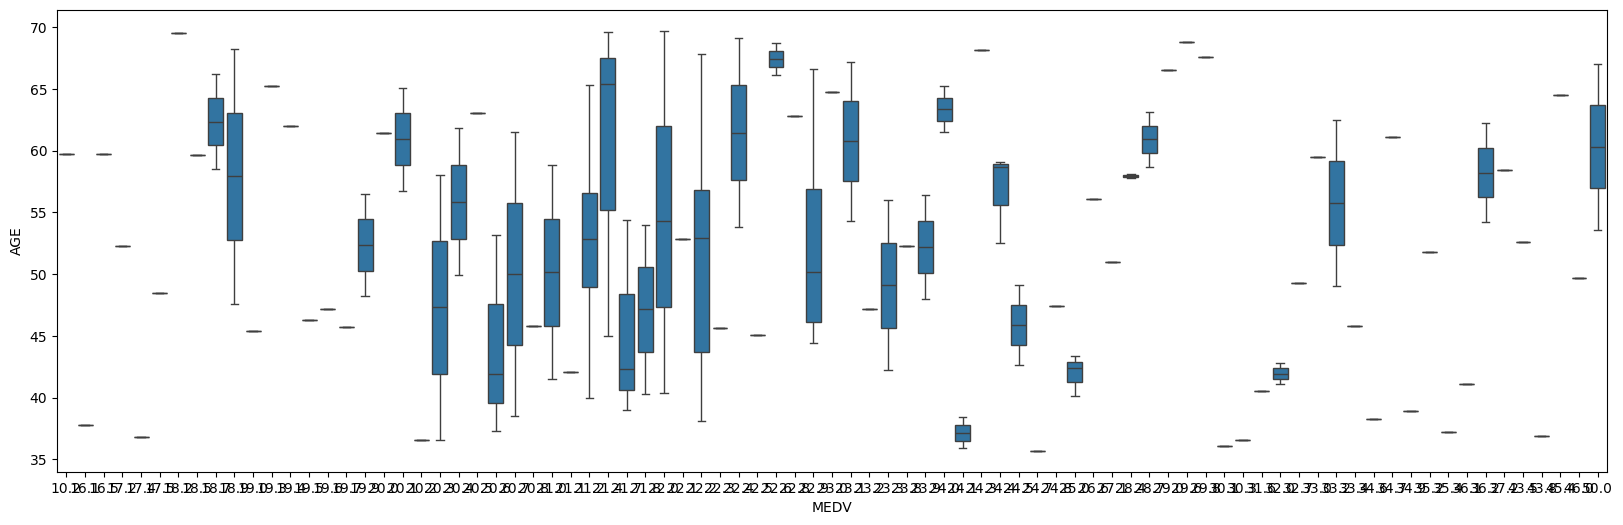

In [55]:
#•	Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
pyplot.figure(figsize=(20, 6))
age_70_plus = boston_df[boston_df['AGE'] > 70]
sns.boxplot(x='MEDV', y='AGE', data=age_70_plus)
pyplot.show()
pyplot.figure(figsize=(20, 6))
age_35_less = boston_df[boston_df['AGE'] < 35]
sns.boxplot(x='MEDV', y='AGE', data=age_35_less)
pyplot.show()
pyplot.figure(figsize=(20, 6))
age_35_70 = boston_df[(boston_df['AGE'] <= 70) & (boston_df['AGE'] >= 35)]
sns.boxplot(x='MEDV', y='AGE', data=age_35_70)
pyplot.show()

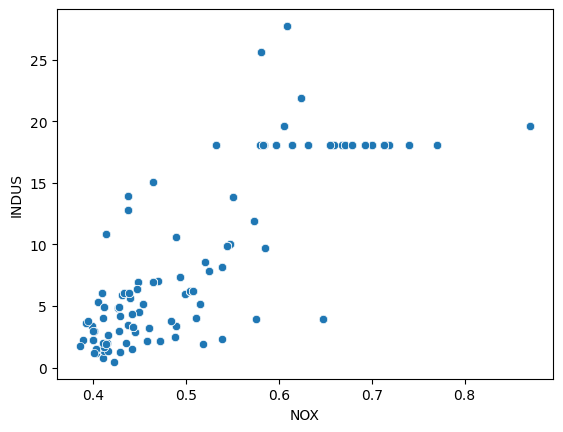

In [36]:
# •	Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.show()

There seems to be a positive relationship between 2 variables.

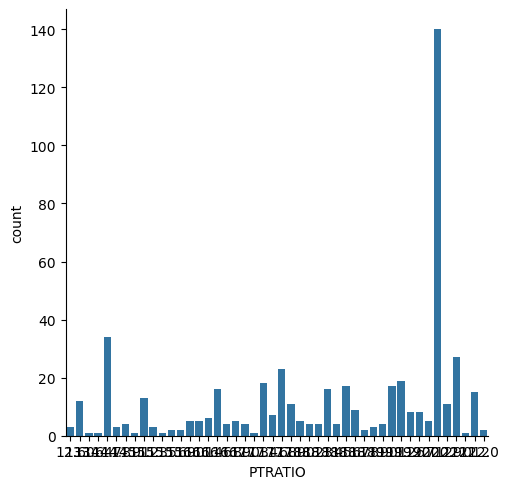

In [58]:
#•	Create a histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', kind='count', data=boston_df)
pyplot.show()

In [47]:
#	Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

Since the p-value is lesser than 0.05 we can assume inequality of variance

In [48]:
#•	Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
before_1940 = boston_df[boston_df['AGE'] > 40 ]['MEDV']
after_1940 = boston_df[boston_df['AGE'] <= 1940]['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(before_1940, after_1940)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 4.780911703714857, P-Value: 0.029033467363600088


Since P-Value is less than 0.05 , we can reject null hypothesis. There is difference in median values

In [49]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

As p-value is less than 0.05, we can conclude that there is a relationship between two variables

In [50]:
#	What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


X_DIS = boston_df['DIS']

y = boston_df['MEDV']

X_DIS = sm.add_constant(X_DIS) 

model = sm.OLS(y, X_DIS).fit()
predictions = model.predict(X_DIS)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 30 Oct 2025   Prob (F-statistic):           1.21e-08
Time:                        14:22:56   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

P > 0.05. There is evidence of correlation between Five bostone employment centers and median valus if owner occupied homes